In [130]:
from dask import delayed
from time import sleep, time

In [137]:
startTime = time()

@delayed
def inc(x):
    sleep(1)
    return x + 1
@delayed
def add(x,y):
    print(f"Adding {x} to {y}. Current time is {time()-startTime:.2f}s")
    sleep(1)
    return x + y

In [138]:
x = inc(1)
y = inc(2)
z = add(x,y)

In [139]:
%%time
z.compute()

Adding 2 to 3. Current time is 1.58s
CPU times: user 14.1 ms, sys: 930 µs, total: 15 ms
Wall time: 2.01 s


5

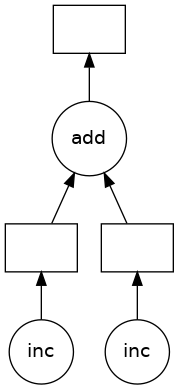

In [140]:
z.visualize()

In [141]:
def sumBU(a):
    sums = [n for n in a]
    
    while len(sums) > 1:
        nextSums = []
        for i in range(0,len(sums),2):
            nextSums.append(add(sums[i],sums[i+1]))
        sums = nextSums
        
    return sums[0]

def innerSumTD(a,l,r):
    if r == l:
        return a[l]

    mid = l + (r - l) // 2
    left = innerSumTD(a,l,mid)
    right = innerSumTD(a,mid+1,r)
    
    return add(left,right)
    
def sumTD(a):
    return innerSumTD(a,0,len(a)-1)

In [148]:
startTime = time()

In [149]:
%%time
a = [1]*16

sbu = sumBU(a)
std = sumTD(a)

CPU times: user 2.9 ms, sys: 2.97 ms, total: 5.87 ms
Wall time: 3.98 ms


In [150]:
%time print(sbu.compute())
%time print(std.compute())

Adding 1 to 1. Current time is 1.05s
Adding 1 to 1. Current time is 1.06s
Adding 1 to 1. Current time is 1.06s
Adding 1 to 1. Current time is 1.06s
Adding 1 to 1. Current time is 2.06s
Adding 2 to 2. Current time is 2.06sAdding 1 to 1. Current time is 2.06s

Adding 2 to 2. Current time is 2.06s
Adding 1 to 1. Current time is 3.06s
Adding 2 to 2. Current time is 3.06s
Adding 1 to 1. Current time is 3.07s
Adding 4 to 4. Current time is 3.07s
Adding 2 to 2. Current time is 4.07s
Adding 4 to 4. Current time is 5.07s
Adding 8 to 8. Current time is 6.08s
16
CPU times: user 51.5 ms, sys: 18.9 ms, total: 70.4 ms
Wall time: 6.03 s
Adding 1 to 1. Current time is 7.09sAdding 1 to 1. Current time is 7.10s
Adding 1 to 1. Current time is 7.10s

Adding 1 to 1. Current time is 7.10s
Adding 1 to 1. Current time is 8.10s
Adding 1 to 1. Current time is 8.10s
Adding 2 to 2. Current time is 8.10s
Adding 2 to 2. Current time is 8.11s
Adding 1 to 1. Current time is 9.10s
Adding 2 to 2. Current time is 9.10s


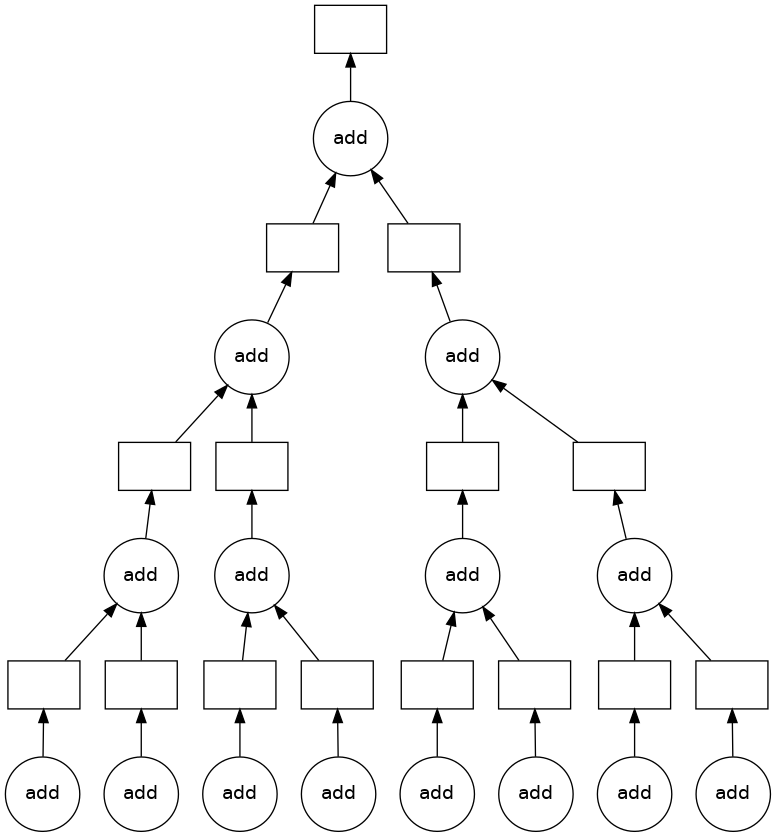

In [151]:
sbu.visualize()

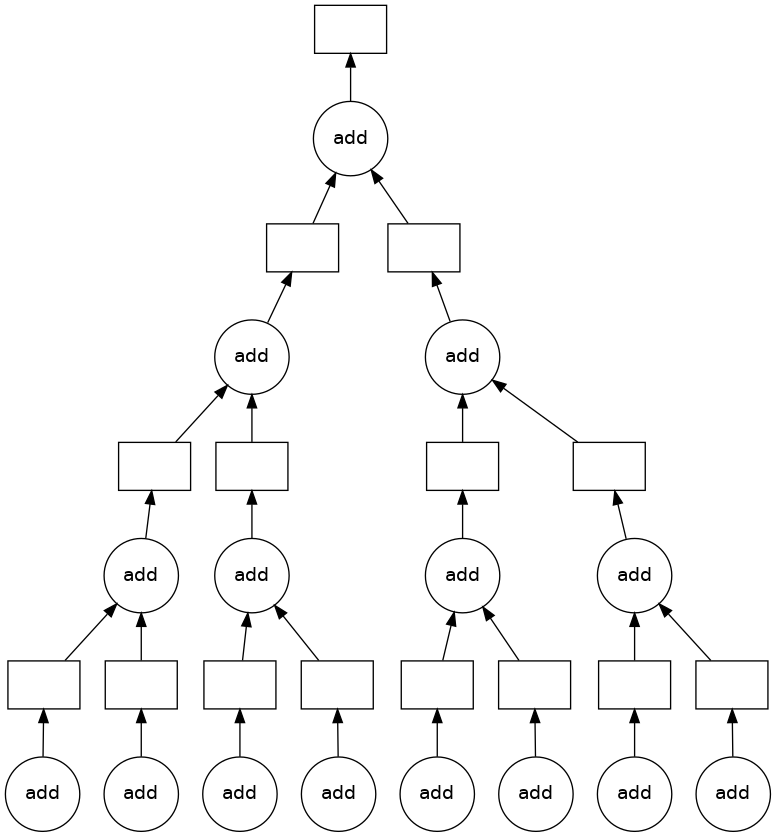

In [152]:
std.visualize()

In [1]:
from mergepath import ParallelMerger

In [2]:
a = [1,2,3,5,7,4,6,8]

pm = ParallelMerger(
    threads = 4,
    array = a,
    left = 0,
    mid = 4,
    right = 7
)

In [3]:
lm = pm.compute()

In [4]:
for m in lm:
    m.visualize()
    m.compute()

In [5]:
lm

[Delayed('mergeByLength-149cbf15-7c91-4c2b-97f8-5f2e485d4b8e'),
 Delayed('mergeByLength-1f363246-7f4a-41e3-90aa-d6eaedb54fe2'),
 Delayed('mergeByLength-537c3843-3bb1-446c-aadd-55b134636b4f'),
 Delayed('mergeByLength-dc01e74a-f27d-4519-a34c-a21755d0ca05')]

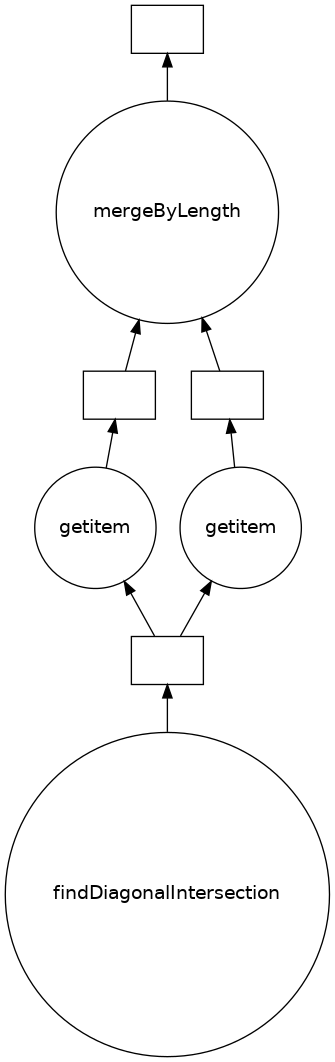

In [9]:
lm[3].visualize()